In [2]:
import pandas as pd
from sklearn.metrics import roc_curve, auc
df = pd.read_csv("./resources/temp.csv")

In [4]:
df

,state,stars,review_count,is_open,total_hours,Food,American (Traditional),Sandwiches,Nightlife,Bars,...,RestaurantsDelivery,BusinessAcceptsCreditCards,OutdoorSeating,RestaurantsReservations,GoodForKids,WiFi,Caters,RestaurantsTableService,HappyHour,temp
0,0,2.0,116,0,105.0,1,1,0,0,0,...,1,-1,-1,-1,-1,-1,-1,-1,-1,4
1,1,4.0,276,1,57.0,1,0,1,0,0,...,1,1,1,0,1,0,1,-1,-1,1
2,2,4.5,18,0,0.0,0,0,1,0,0,...,1,1,0,0,1,-1,-1,-1,-1,1
3,3,1.5,28,1,72.5,1,1,0,0,0,...,0,1,1,1,1,1,1,1,-1,1
4,0,4.0,29,1,45.0,1,0,0,0,0,...,1,1,1,0,1,-1,0,0,-1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,12,2.5,32,1,68.0,1,0,1,0,0,...,1,1,0,0,1,-1,1,-1,-1,4
196,1,3.5,19,1,75.5,0,0,0,0,0,...,1,1,1,1,1,1,1,1,0,0
197,1,4.5,29,1,22.5,1,0,0,0,0,...,-1,1,-1,-1,-1,-1,1,-1,-1,2
198,2,3.5,44,1,78.5,0,0,0,0,0,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,2


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_validate

features = df.drop(['temp'], axis=1)
labels = df['temp']
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.4, random_state=42)

In [4]:
clf = GaussianNB()
model = cross_validate(clf, features, labels, cv=3)

In [5]:
model

{'fit_time': array([0.00192356, 0.0009706 , 0.00100088]),
 'score_time': array([0.00202608, 0.00100183, 0.00100064]),
 'test_score': array([0.94029851, 0.91044776, 0.92424242])}

In [18]:
model = clf.fit(x_train, y_train)
y_score = model.predict(x_test)

AttributeError: 'GaussianNB' object has no attribute 'decision_function'

In [15]:
y_test

95     3
15     1
30     1
158    1
128    2
      ..
113    3
26     1
139    2
100    2
111    1
Name: temp, Length: 80, dtype: int64

In [16]:
y_score

array([3, 1, 1, 1, 2, 1, 2, 4, 0, 1, 4, 3, 1, 3, 4, 2, 3, 3, 2, 0, 2, 3,
       3, 3, 1, 1, 3, 4, 1, 4, 4, 2, 4, 1, 2, 3, 4, 2, 1, 1, 4, 1, 2, 3,
       0, 4, 2, 2, 3, 3, 0, 0, 1, 4, 2, 0, 1, 4, 0, 1, 1, 0, 2, 3, 1, 1,
       1, 1, 1, 1, 3, 1, 4, 1, 1, 3, 1, 2, 2, 1], dtype=int64)

In [21]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(5):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_score, pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])

In [59]:
tpr

{0: array([0.        , 0.        , 0.14285714, 0.14285714, 0.14285714,
        1.        ]),
 1: array([0.        , 0.        , 0.        , 0.03448276, 1.        ,
        1.        ]),
 2: array([0.        , 0.07142857, 0.07142857, 1.        , 1.        ,
        1.        ]),
 3: array([0.        , 0.        , 0.88235294, 0.88235294, 0.88235294,
        1.        ]),
 4: array([0.        , 0.92307692, 0.92307692, 1.        , 1.        ,
        1.        ])}

In [56]:
def plotROC(ax, i):
    lw = i
    ax.plot(
        fpr[i],
        tpr[i],
        color="darkorange",
        lw=lw,
        label="ROC curve (area = %0.2f)" % roc_auc[i],
    )
    ax.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
    ax.legend(loc="lower right")

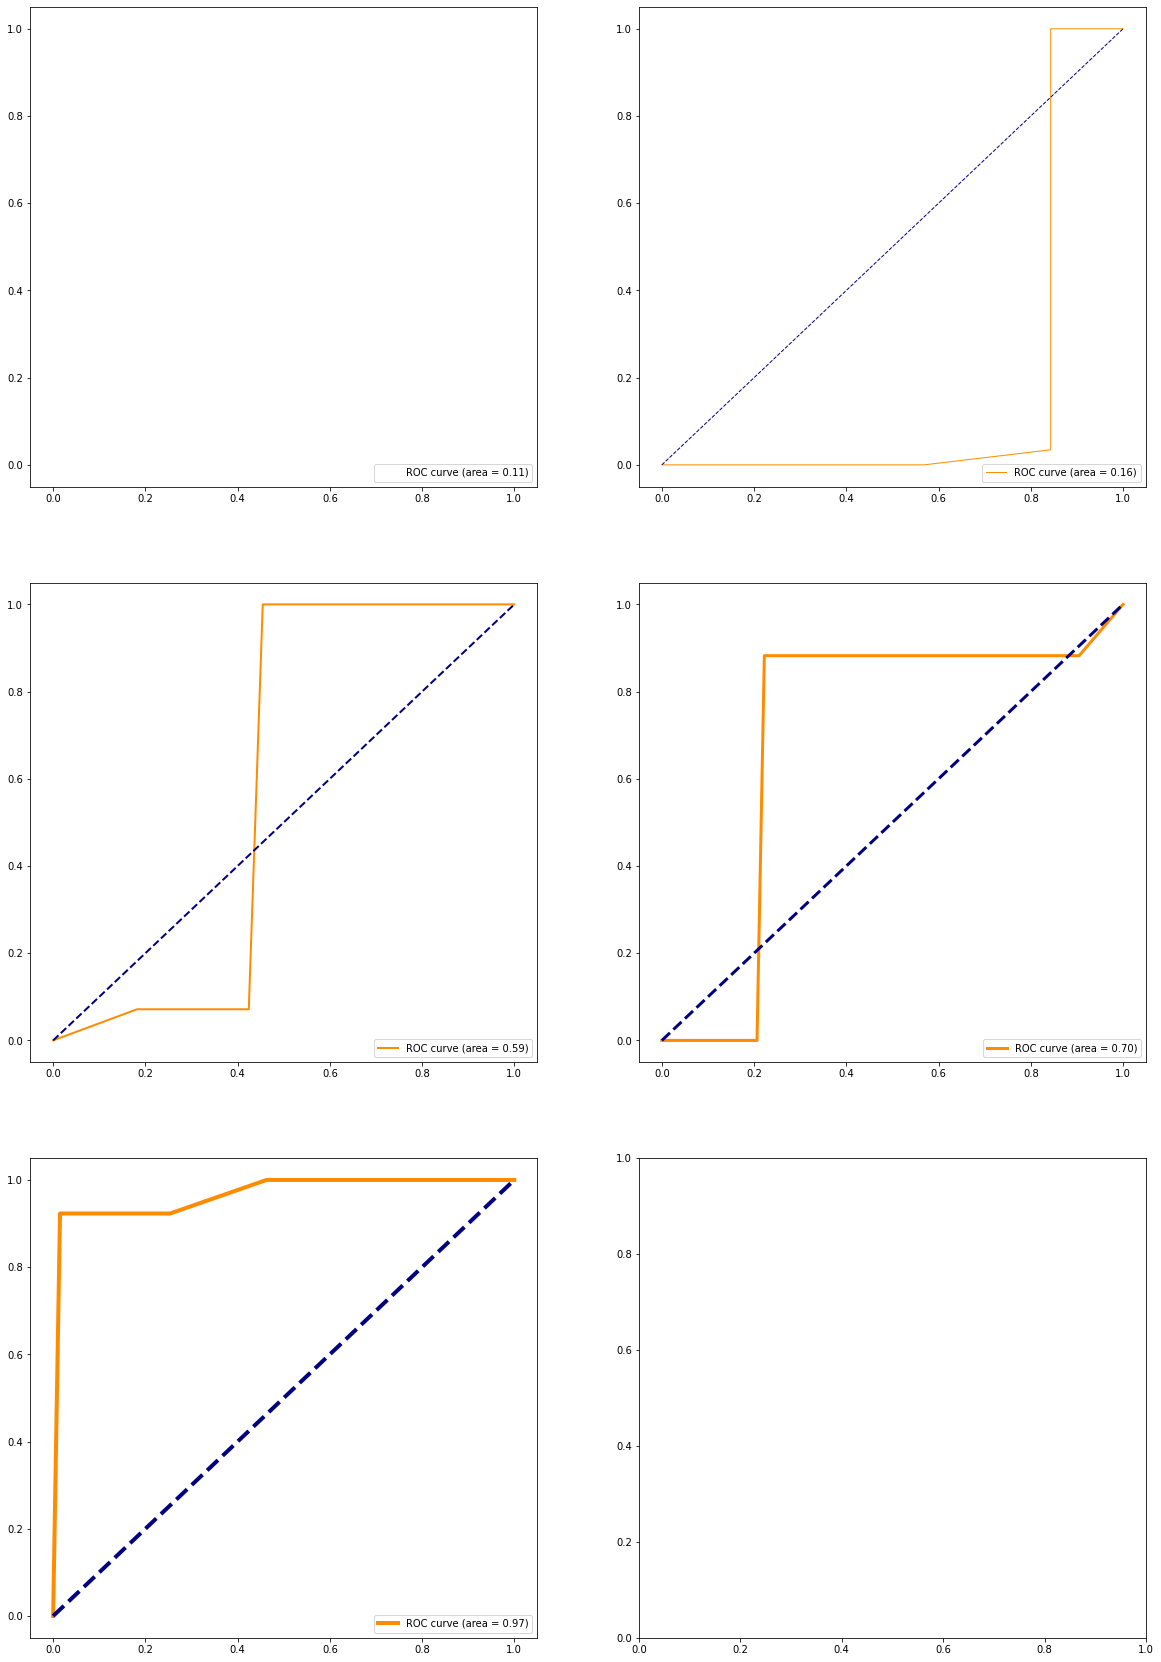

In [57]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(3, 2, figsize=(10*2,10*3))
plotROC(ax[0,0], 0)
plotROC(ax[0,1], 1)
plotROC(ax[1,0], 2)
plotROC(ax[1,1], 3)
plotROC(ax[2,0], 4)


In [92]:
from iguanas.rule_generation import RuleGeneratorDT
from iguanas.rule_optimisation import BayesianOptimiser
from iguanas.metrics.classification import FScore, Precision
from iguanas.metrics.pairwise import JaccardSimilarity
from iguanas.rules import Rules, ConvertProcessedConditionsToGeneral, ReturnMappings
from iguanas.correlation_reduction import AgglomerativeClusteringReducer
from iguanas.rule_selection import SimpleFilter, GreedyFilter, CorrelatedFilter
from iguanas.rbs import RBSPipeline, RBSOptimiser

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from category_encoders.one_hot import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
import pickle
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import seaborn as sns

In [115]:
df = pd.read_csv("./resources/temp2.csv")#, index_col = "stars")

In [116]:
X = df.drop(columns=["state", "temp", "stars"])#, "review_count", "total_hours"])
y = df["stars"]

In [117]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.33,
    random_state=0
)

In [118]:
X

,review_count,is_open,total_hours,Food,American (Traditional),Sandwiches,Nightlife,Bars,Fast Food,American (New),...,RestaurantsTakeOut,RestaurantsDelivery,BusinessAcceptsCreditCards,OutdoorSeating,RestaurantsReservations,GoodForKids,WiFi,Caters,RestaurantsTableService,HappyHour
0,116,0,105.0,1,1,0,0,0,1,0,...,1,1,0,0,0,0,0,0,0,0
1,276,1,57.0,1,0,1,0,0,1,1,...,1,1,1,1,0,1,0,1,0,0
2,18,0,0.0,0,0,1,0,0,0,0,...,1,1,1,0,0,1,0,0,0,0
3,28,1,72.5,1,1,0,0,0,0,0,...,1,0,1,1,1,1,1,1,1,0
4,29,1,45.0,1,0,0,0,0,1,0,...,1,1,1,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,32,1,68.0,1,0,1,0,0,1,0,...,1,1,1,0,0,1,0,1,0,0
196,19,1,75.5,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,0
197,29,1,22.5,1,0,0,0,0,0,0,...,1,0,1,0,0,0,0,1,0,0
198,44,1,78.5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [119]:
y

0      2.0
1      4.0
2      4.5
3      1.5
4      4.0
      ... 
195    2.5
196    3.5
197    4.5
198    3.5
199    4.5
Name: stars, Length: 200, dtype: float64

In [100]:
for i in range(len(y)):
    y[i] = int(y[i]*2)
    y[i] = int(y[i])

C:\Users\George\AppData\Local\Temp\ipykernel_2412\1683461873.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[i] = int(y[i]*2)
C:\Users\George\AppData\Local\Temp\ipykernel_2412\1683461873.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[i] = int(y[i])


In [113]:
for row in y:
    print(row)

2.0
4.0
4.5
1.5
4.0
2.5
4.5
3.0
5.0
2.0
3.0
3.0
4.5
3.5
4.5
4.5
4.0
3.0
3.5
4.5
3.5
3.5
2.5
4.5
4.5
4.0
3.0
4.5
3.0
4.0
2.5
4.5
4.5
2.5
3.5
3.5
4.0
4.0
3.0
3.0
4.5
3.5
4.0
4.5
2.0
3.5
4.0
4.0
3.5
1.0
3.0
2.5
4.5
2.5
3.0
2.0
3.5
4.0
3.5
3.5
3.5
3.5
3.5
2.5
3.0
4.0
3.0
2.5
3.0
3.5
3.0
4.5
4.5
3.0
4.0
4.0
4.5
4.5
3.0
2.5
4.0
4.0
5.0
4.0
3.5
3.0
4.0
4.0
3.5
4.0
4.5
4.0
4.0
3.5
3.0
3.5
3.5
4.0
1.5
3.0
4.0
4.0
3.5
2.5
3.5
4.0
3.0
3.5
4.0
3.0
4.5
3.5
4.5
2.5
3.0
4.0
1.5
4.5
4.0
4.5
4.0
4.0
3.5
3.0
4.0
3.5
2.5
3.0
4.0
5.0
4.5
2.0
2.0
4.5
4.0
2.0
3.5
3.0
3.5
4.0
3.0
4.0
2.0
3.0
2.5
3.0
3.0
3.5
3.0
4.0
4.0
3.5
4.5
3.5
4.5
4.0
4.0
3.5
3.5
3.5
3.0
4.0
1.5
3.5
3.5
3.5
3.5
3.5
3.5
3.5
1.5
3.5
4.0
2.5
3.0
5.0
3.5
4.0
3.5
4.0
2.0
3.0
4.0
3.5
3.0
4.5
1.5
4.0
2.5
2.5
3.5
3.5
3.5
2.0
3.0
2.5
3.5
4.5
3.5
4.5


In [120]:
p = Precision()
f1 = FScore(beta=1)

In [121]:
params = {
    'metric': f1.fit,
    'n_total_conditions': 33,   
    'tree_ensemble': RandomForestClassifier(n_estimators=10, random_state=0),
    'target_feat_corr_types': 'Infer',
    'num_cores': 4,
    'verbose': 1
}

In [122]:
rg = RuleGeneratorDT(**params)

In [123]:
X_rules_gen_train = rg.fit(
    X=X_train,
    y=y_train.astype('int'),
)

--- Calculating correlation of features with respect to the target ---
--- Returning column datatypes ---
--- Training tree ensemble ---
--- Extracting rules from tree ensemble ---
100%|█████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 589.87it/s]


In [124]:
X_rules_gen_train.head()

,RGDT_Rule_20220801_0,RGDT_Rule_20220801_1,RGDT_Rule_20220801_2,RGDT_Rule_20220801_3,RGDT_Rule_20220801_4,RGDT_Rule_20220801_5,RGDT_Rule_20220801_6,RGDT_Rule_20220801_7,RGDT_Rule_20220801_8,RGDT_Rule_20220801_9,...,RGDT_Rule_20220801_75,RGDT_Rule_20220801_76,RGDT_Rule_20220801_77,RGDT_Rule_20220801_78,RGDT_Rule_20220801_79,RGDT_Rule_20220801_80,RGDT_Rule_20220801_81,RGDT_Rule_20220801_82,RGDT_Rule_20220801_83,RGDT_Rule_20220801_84
54,1,0,0,0,0,1,1,0,1,0,...,1,1,1,1,0,1,0,0,0,1
163,1,0,0,0,0,1,1,0,1,0,...,1,1,1,1,0,1,0,0,1,1
51,1,0,0,0,0,0,1,0,1,0,...,1,0,0,0,1,1,0,0,0,1
86,1,1,0,1,0,1,1,1,1,1,...,1,1,1,1,0,1,0,1,1,1
139,1,0,0,0,0,0,1,0,0,0,...,0,1,1,1,0,1,0,0,0,1


In [126]:
with open('dummy_data/rule_strings.pkl', 'rb') as f:
    rule_strings = pickle.load(f)

NameError: name 'rule_strings' is not defined

In [30]:
help(FScore)

Help on class FScore in module iguanas.metrics.classification:

class FScore(builtins.object)
 |  FScore(beta: float)
 |  
 |  Calculates the Fbeta score for either a single or set of binary
 |  predictors.
 |  
 |  Parameters
 |  ----------
 |  beta : float
 |      The beta value used to calculate the Fbeta score.   
 |  
 |  Examples
 |  --------
 |  >>> import pandas as pd
 |  >>> from iguanas.metrics import FScore
 |  >>> X = pd.DataFrame({
 |  ...     'A': [1, 0, 1, 0],
 |  ...     'B': [1, 1, 1, 0]
 |  ... })
 |  >>> y = pd.Series([
 |  ...     1, 0, 1, 0
 |  ... ])
 |  >>> f1 = FScore(beta=1)
 |  >>> print(f1.fit(y_preds=X, y_true=y))
 |  [1.  0.8]
 |  
 |  Methods defined here:
 |  
 |  __init__(self, beta: float)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  __repr__(self)
 |      Return repr(self).
 |  
 |  fit(self, y_preds: Union[ForwardRef('numpy.ndarray'), ForwardRef('pandas.core.series.Series'), ForwardRef('databricks.koalas.series.Serie

In [39]:
x = 2.0
y = str(x)

In [40]:
y

'2.0'